# Ch08 Market Basket Analysis

# Exercise 39: Creating Sample Transaction Data

1. Open a Jupyter notebook with Python 3

2. Install the following libraries: matplotlib.pyplot, which is used to plot the results of the models, mlxtend.frequent_patterns, which is used to run the models, mlxtend.preprocessing, which is used to encode and prep the data for the models, numpy, which is used to work with arrays, and pandas, which is used to work with DataFrames

In [1]:
!pip install mlxtend

In [2]:
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy
import pandas

3. Create 10 fake transactions featuring grocery store items. The data will take the form of a list of lists, a data structure that will be relevant later when discussing formatting transaction data for the models:

In [3]:
example = [
    ['milk', 'bread', 'apples', 'cereal', 'jelly', 
     'cookies', 'salad', 'tomatoes'],
    ['beer', 'milk', 'chips', 'salsa', 'grapes', 
     'wine', 'potatoes', 'eggs', 'carrots'],
    ['diapers', 'baby formula', 'milk', 'bread', 
     'chicken', 'asparagus', 'cookies'],
    ['milk', 'cookies', 'chicken', 'asparagus', 
     'broccoli', 'cereal', 'orange juice'],
    ['steak', 'asparagus', 'broccoli', 'chips', 
     'salsa', 'ketchup', 'potatoes', 'salad'],
    ['beer', 'salsa', 'asparagus', 'wine', 'cheese', 
     'crackers', 'strawberries', 'cookies'],
    ['chocolate cake', 'strawberries', 'wine', 'cheese', 
     'beer', 'milk', 'orange juice'],
    ['chicken', 'peas', 'broccoli', 'milk', 'bread', 
     'eggs', 'potatoes', 'ketchup', 'crackers'],
    ['eggs', 'bread', 'cheese', 'turkey', 'salad', 
     'tomatoes', 'wine', 'steak', 'carrots'],
    ['bread', 'milk', 'tomatoes', 'cereal', 'chicken', 
     'turkey', 'chips', 'salsa', 'diapers']
]

# Exercise 40: Computing Metrics

1. Define and print the frequencies that are the basis of all five metrics, which would be Frequency(Milk), Frequency(Bread), and Frequency(Milk, Bread). Also, define N as the total number of transactions in the dataset.

In [4]:
N = len(example)
f_x = sum(['milk' in i for i in example]) # milk
f_y = sum(['bread' in i for i in example]) # bread
f_x_y = sum([
    all(w in i for w in ['milk', 'bread']) 
    for i in example
])

print(
    "N = {}\n".format(N) + 
    "Freq(x) = {}\n".format(f_x) + 
    "Freq(y) = {}\n".format(f_y) + 
    "Freq(x, y) = {}".format(f_x_y)
)

N = 10
Freq(x) = 7
Freq(y) = 5
Freq(x, y) = 4


2. Calculate and print Support(Milk  Bread):

In [5]:
support = f_x_y / N
print("Support = {}".format(round(support, 4)))

Support = 0.4


3. Calculate and print Confidence(Milk  Bread)

In [6]:
confidence = support / (f_x / N)
print("Confidence = {}".format(round(confidence, 4)))

Confidence = 0.5714


4. Calculate and print Lift(Milk  Bread)

In [7]:
lift = confidence / (f_y / N)
print("Lift = {}".format(round(lift, 4)))

Lift = 1.1429


5. Calculate and print Leverage(Milk  Bread)

In [8]:
leverage = support - ((f_x / N) * (f_y / N))
print("Leverage = {}".format(round(leverage, 4)))

Leverage = 0.05


6. Calculate and print Conviction(Milk  Bread)

In [9]:
conviction = (1 - (f_y / N)) / (1 - confidence)
print("Conviction = {}".format(round(conviction, 4)))

Conviction = 1.1667


# Exercise 41: Loading Data

1. Using the read_excel function from pandas, load the data. Note that the first row of the Excel file contains the column names

In [10]:
import pandas as pd

In [11]:
online = pd.read_excel('Online Retail.xlsx')

In [12]:
# online = pandas.read_excel(
#     io="Online Retail.xlsx", 
#     sheet_name="Online Retail", 
#     header=0
# )

2. Print out the first 10 rows of the DataFrame. Notice that the data contains some columns that will not be relevant to market basket analysis

In [13]:
online.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


3. Print out the data type for each column in the DataFrame. This information will come in handy when trying to perform specific cleaning tasks

In [14]:
online.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

4. Get the dimensions of the DataFrame, as well as the number of unique invoice numbers and customer identifications

In [15]:
print(
     "Data dimension (row count, col count): {dim}"
     .format(dim=online.shape)
)
print(
     "Count of unique invoice numbers: {cnt}"
     .format(cnt=online.InvoiceNo.nunique())
)
print(
     "Count of unique customer ids: {cnt}"
     .format(cnt=online.CustomerID.nunique())
)

Data dimension (row count, col count): (541909, 8)
Count of unique invoice numbers: 25900
Count of unique customer ids: 4372


# Exercise 42: Data Cleaning and Formatting

1. Create an indicator column stipulating whether the invoice number begins with "C":

In [16]:
online['IsCPresent'] = (
    online['InvoiceNo']
    .astype(str)
    .apply(lambda x: 1 if x.find('C') != -1 else 0)
)

2. Filter out all transactions having either zero or a negative number of items, remove all invoice numbers starting with "C" using the column created in step one, subset the DataFrame down to InvoiceNo and Description, and lastly, drop all rows with at least one missing value. Rename the DataFrame online

In [17]:
online1 = (
    online
    # filter out non-positive quantity values
    .loc[online["Quantity"] > 0]
    # remove InvoiceNos starting with C
    .loc[online['IsCPresent'] != 1]
    # column filtering
    .loc[:, ["InvoiceNo", "Description"]]
    # dropping all rows with at least one missing value
    .dropna()
)

3. Print out the first 10 rows of the filtered DataFrame, online1:

In [18]:
online1.head(10)

,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
5,536365,SET 7 BABUSHKA NESTING BOXES
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER
7,536366,HAND WARMER UNION JACK
8,536366,HAND WARMER RED POLKA DOT
9,536367,ASSORTED COLOUR BIRD ORNAMENT


4. Print out the dimensions of the cleaned DataFrame and the number of unique invoice numbers

In [19]:
print(
    "Data dimension (row count, col count): {dim}"
    .format(dim=online1.shape)
)
print(
    "Count of unique invoice numbers: {cnt}"
    .format(cnt=online1.InvoiceNo.nunique())
)

Data dimension (row count, col count): (530693, 2)
Count of unique invoice numbers: 20136


5. Extract the invoice numbers from the DataFrame as a list. Remove duplicate elements to create a list of unique invoice numbers. Confirm that the process was successful by printing the length of the list of unique invoice numbers. Compare with the output of Step 4

In [20]:
invoice_no_list = online1.InvoiceNo.tolist()
invoice_no_list = list(set(invoice_no_list))
print(
    "Length of list of invoice numbers: {ln}"
    .format(ln=len(invoice_no_list))
)

Length of list of invoice numbers: 20136


6. Take the list from step five and cut it to only include the first 5,000 elements. Print out the length of the new list to confirm that it is, in fact, the expected length of 5,000

In [21]:
subset_invoice_no_list = invoice_no_list[0:5000]
print(
    "Length of subset list of invoice numbers: {ln}"
    .format(ln=len(subset_invoice_no_list))
)

Length of subset list of invoice numbers: 5000


7. Filter the online1 DataFrame down by only keeping the invoice numbers in the list from the previous step

In [22]:
online1 = online1.loc[online1["InvoiceNo"].isin(subset_invoice_no_list)]

8. Print out the first 10 rows of online1

In [23]:
online1.head(10)

,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
5,536365,SET 7 BABUSHKA NESTING BOXES
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER
7,536366,HAND WARMER UNION JACK
8,536366,HAND WARMER RED POLKA DOT
9,536367,ASSORTED COLOUR BIRD ORNAMENT


9. Print out the dimensions of the DataFrame and the number of unique invoice numbers to confirm that the filtering and cleaning process was successful

In [24]:
print(
    "Data dimension (row count, col count): {dim}"
    .format(dim=online1.shape)
)
print(
    "Count of unique invoice numbers: {cnt}"
    .format(cnt=online1.InvoiceNo.nunique())
)

Data dimension (row count, col count): (133315, 2)
Count of unique invoice numbers: 5000


10. Transform the data in online1 into the aforementioned list of lists called invoice_item_list. The process for doing this is to iterate over the unique invoice numbers and, at each iteration, extract the item descriptions as a list and append that list to the larger invoice_item_list list. Print out elements one through four of the list

In [25]:
invoice_item_list = []
for num in list(set(online1.InvoiceNo.tolist())):
    # filter dataset down to one invoice number
    tmp_df = online1.loc[online1['InvoiceNo'] == num]
    # extract item descriptions and convert to list
    tmp_items = tmp_df.Description.tolist()
    # append list invoice_item_list
    invoice_item_list.append(tmp_items)
    
print(invoice_item_list[1:5])

[['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'], ['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND'], ['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION'], ['BATH BUILDING BLOCK WORD']]


# Exercise 43: Data Encoding

1. Initialize and fit the transaction encoder. Print out an example of the resulting data

In [26]:
online_encoder = mlxtend.preprocessing.TransactionEncoder()
online_encoder_array = online_encoder.fit_transform(invoice_item_list)
print(online_encoder_array)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


2. Recast the encoded array as a DataFrame named online_encoder_df. Print out a predefined subset of the DataFrame that features both true and false values:

In [27]:
online_encoder_df = pandas.DataFrame(
    online_encoder_array, 
    columns=online_encoder.columns_
)

# this is a very big table, so for more 
# easy viewing only a subset is printed
online_encoder_df.loc[
    4970:4979, 
    online_encoder_df.columns.tolist()[0:8]
]

,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS
4970,False,False,False,False,False,False,False,False
4971,False,False,False,False,False,False,False,False
4972,False,False,False,False,False,False,False,False
4973,False,False,True,False,False,False,False,False
4974,False,False,False,False,False,False,False,False
4975,False,False,False,False,False,False,False,False
4976,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False


3. Print out the dimensions of the encoded DataFrame. It should have 5,000 rows because the data used to generate it was previously filtered down to 5,000 unique invoice numbers

In [28]:
print(
    "Data dimension (row count, col count): {dim}"
    .format(dim=online_encoder_df.shape)
)

Data dimension (row count, col count): (5000, 3135)


# Activity 18: Loading and Preparing Full Online Retail Data

1. Load the online retail dataset file

In [29]:
#Activity01
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy
import pandas

online = pandas.read_excel(
    io="Online Retail.xlsx", 
    sheet_name="Online Retail", 
    header=0
)

2. Clean and prep the data for modeling, including turning the cleaned data into a list of lists

In [30]:
# takes too long

online['IsCPresent'] = (
    online['InvoiceNo']
    .astype(str)
    .apply(lambda x: 1 if x.find('C') != -1 else 0)
)

online1 = (
    online
    .loc[online["Quantity"] > 0]
    .loc[online['IsCPresent'] != 1]
    .loc[:, ["InvoiceNo", "Description"]]
    .dropna()
)

invoice_item_list = []
for num in list(set(online1.InvoiceNo.tolist())):
    tmp_df = online1.loc[online1['InvoiceNo'] == num]
    tmp_items = tmp_df.Description.tolist()
    invoice_item_list.append(tmp_items)

KeyboardInterrupt: 

3. Encode the data and recast it as a DataFrame

In [ ]:
online_encoder = mlxtend.preprocessing.TransactionEncoder()
online_encoder_array = online_encoder.fit_transform(invoice_item_list)

online_encoder_df = pandas.DataFrame(
    online_encoder_array, 
    columns=online_encoder.columns_
)

online_encoder_df.loc[
    20125:20135, 
    online_encoder_df.columns.tolist()[100:110]
]

# Exercise 44: Executing the Apriori algorithm

1. Run the Apriori algorithm using mlxtend without changing any of the default parameter values

In [31]:
mod = mlxtend.frequent_patterns.apriori(online_encoder_df)
mod

,support,itemsets


2. Rerun the Apriori algorithm, but with the minimum support set to 0.01. This minimum support value is the same as saying that when analyzing 5,000 transactions, we need an item set to appear 50 times to be considered frequent. As mentioned previously, the minimum support can be set to any value in the range [0,1]. There is no best minimum support value; the setting of this value is entirely subjective. Many businesses have their own specific thresholds for significance, but there is no industry standard or method for optimizing this value

In [32]:
mod_minsupport = mlxtend.frequent_patterns.apriori(
    online_encoder_df,
    min_support=0.01
)
mod_minsupport.loc[0:6]

,support,itemsets
0,0.0110,(1)
1,0.0340,(2)
2,0.0178,(6)
3,0.0126,(10)
4,0.0132,(11)
5,0.0178,(12)
6,0.0276,(13)


3. Rerun the Apriori algorithm with the same minimum support as in Step 2, but this time set use_colnames to True. This will replace the numerical designations with the actual item names.

In [33]:
mod_colnames_minsupport = mlxtend.frequent_patterns.apriori(
    online_encoder_df, 
    min_support=0.01,
    use_colnames=True
)
mod_colnames_minsupport.loc[0:6]

,support,itemsets
0,0.0110,( OVAL WALL MIRROR DIAMANTE )
1,0.0340,( SET 2 TEA TOWELS I LOVE LONDON )
2,0.0178,(10 COLOUR SPACEBOY PEN)
3,0.0126,(12 IVORY ROSE PEG PLACE SETTINGS)
4,0.0132,(12 MESSAGE CARDS WITH ENVELOPES)
5,0.0178,(12 PENCIL SMALL TUBE WOODLAND)
6,0.0276,(12 PENCILS SMALL TUBE RED RETROSPOT)


4. Add an additional column to the output of Step 3 that contains the size of the item set, which will help with filtering and further analysis

In [34]:
mod_colnames_minsupport['length'] = (
    mod_colnames_minsupport['itemsets'].apply(lambda x: len(x))
)
mod_colnames_minsupport.loc[0:6]

,support,itemsets,length
0,0.0110,( OVAL WALL MIRROR DIAMANTE ),1
1,0.0340,( SET 2 TEA TOWELS I LOVE LONDON ),1
2,0.0178,(10 COLOUR SPACEBOY PEN),1
3,0.0126,(12 IVORY ROSE PEG PLACE SETTINGS),1
4,0.0132,(12 MESSAGE CARDS WITH ENVELOPES),1
5,0.0178,(12 PENCIL SMALL TUBE WOODLAND),1
6,0.0276,(12 PENCILS SMALL TUBE RED RETROSPOT),1


5. Find the support of the item set containing '10 COLOUR SPACEBOY PEN'

In [35]:
mod_colnames_minsupport[
    mod_colnames_minsupport['itemsets'] == frozenset(
        {'10 COLOUR SPACEBOY PEN'}
    )
]

,support,itemsets,length
2,0.0178,(10 COLOUR SPACEBOY PEN),1


6. Return all item sets of length 2 whose support is in the range [0.02, 0.021]

In [36]:
mod_colnames_minsupport[
    (mod_colnames_minsupport['length'] == 2) & 
    (mod_colnames_minsupport['support'] >= 0.02) &
    (mod_colnames_minsupport['support'] < 0.021)
] 

,support,itemsets,length
889,0.0200,"(REGENCY CAKESTAND 3 TIER, 6 RIBBONS RUSTIC CH...",2
950,0.0208,"(ALARM CLOCK BAKELIKE ORANGE, ALARM CLOCK BAKE...",2
1309,0.0200,"(DOTCOM POSTAGE, LUNCH BAG RED RETROSPOT)",2
1516,0.0208,"(SINGLE HEART ZINC T-LIGHT HOLDER, HANGING HEA...",2
1565,0.0206,"(JUMBO BAG RED RETROSPOT, HEART OF WICKER SMALL)",2
1640,0.0204,"(HOME BUILDING BLOCK WORD, WHITE HANGING HEART...",2
1753,0.0206,"(JAM MAKING SET WITH JARS, REGENCY CAKESTAND 3...",2
1792,0.0206,"(JUMBO BAG PINK POLKADOT, JUMBO BAG OWLS)",2
1879,0.0208,"(JUMBO BAG RED RETROSPOT, RED RETROSPOT CHARLO...",2
1944,0.0204,"(JUMBO STORAGE BAG SUKI, JUMBO BAG WOODLAND AN...",2


7. Plot the support values. Note that this plot will have no support values less than 0.01 because that was the value used as the minimum support

Text(0.5, 1.0, 'Support')

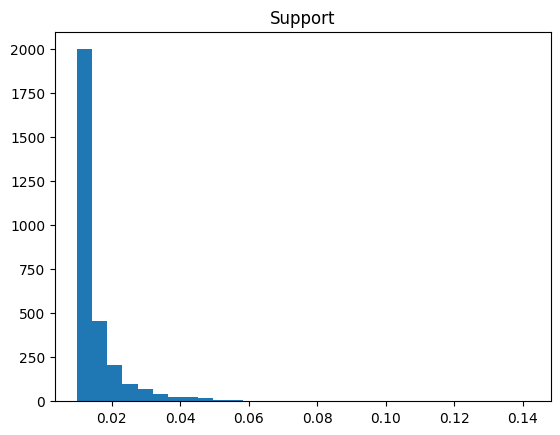

In [37]:
mod_colnames_minsupport.hist("support", grid=False, bins=30)
plt.title("Support")

# Activity 19: Apriori on the Complete Online Retail Dataset

1. Run the Apriori algorithm on the full data with reasonable parameter settings

In [38]:
mod_colnames_minsupport = mlxtend.frequent_patterns.apriori(
    online_encoder_df, 
    min_support=0.01,
    use_colnames=True
)
mod_colnames_minsupport.loc[0:6]

,support,itemsets
0,0.0110,( OVAL WALL MIRROR DIAMANTE )
1,0.0340,( SET 2 TEA TOWELS I LOVE LONDON )
2,0.0178,(10 COLOUR SPACEBOY PEN)
3,0.0126,(12 IVORY ROSE PEG PLACE SETTINGS)
4,0.0132,(12 MESSAGE CARDS WITH ENVELOPES)
5,0.0178,(12 PENCIL SMALL TUBE WOODLAND)
6,0.0276,(12 PENCILS SMALL TUBE RED RETROSPOT)


2. Filter the results down to the item set containing 10 COLOUR SPACEBOY PEN. Compare the support value to that of Exercise 44, Executing the Apriori algorithm.

In [39]:
mod_colnames_minsupport[
    mod_colnames_minsupport['itemsets'] == frozenset(
        {'10 COLOUR SPACEBOY PEN'}
    )
]

,support,itemsets
2,0.0178,(10 COLOUR SPACEBOY PEN)


3. Add another column containing the item set length. Then, filter down to those item sets whose length is two and whose support is in the range [0.02, 0.021]. Compare this to the result from Exercise 44, Executing the Apriori algorithm.

In [40]:
mod_colnames_minsupport['length'] = (
    mod_colnames_minsupport['itemsets'].apply(lambda x: len(x))
)

mod_colnames_minsupport[
    (mod_colnames_minsupport['length'] == 2) & 
    (mod_colnames_minsupport['support'] >= 0.02) &
    (mod_colnames_minsupport['support'] < 0.021)
]

,support,itemsets,length
889,0.0200,"(REGENCY CAKESTAND 3 TIER, 6 RIBBONS RUSTIC CH...",2
950,0.0208,"(ALARM CLOCK BAKELIKE ORANGE, ALARM CLOCK BAKE...",2
1309,0.0200,"(DOTCOM POSTAGE, LUNCH BAG RED RETROSPOT)",2
1516,0.0208,"(SINGLE HEART ZINC T-LIGHT HOLDER, HANGING HEA...",2
1565,0.0206,"(JUMBO BAG RED RETROSPOT, HEART OF WICKER SMALL)",2
1640,0.0204,"(HOME BUILDING BLOCK WORD, WHITE HANGING HEART...",2
1753,0.0206,"(JAM MAKING SET WITH JARS, REGENCY CAKESTAND 3...",2
1792,0.0206,"(JUMBO BAG PINK POLKADOT, JUMBO BAG OWLS)",2
1879,0.0208,"(JUMBO BAG RED RETROSPOT, RED RETROSPOT CHARLO...",2
1944,0.0204,"(JUMBO STORAGE BAG SUKI, JUMBO BAG WOODLAND AN...",2


4. Plot the support values

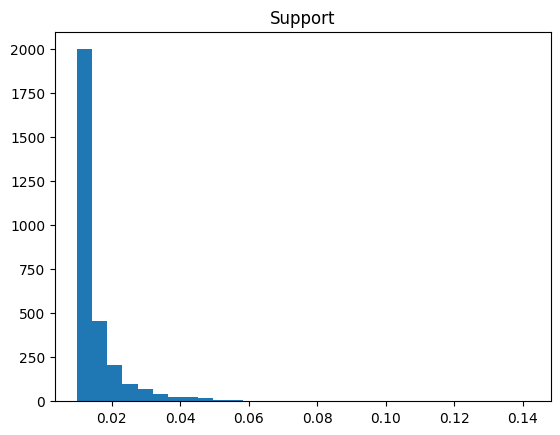

In [41]:
mod_colnames_minsupport.hist("support", grid=False, bins=30)
plt.title("Support");

# Exercise 45: Deriving Association Rules

1. Use the mlxtend library to derive association rules for the online retail dataset. Use confidence as the measure of interestingness, set the minimum threshold to 0.6, and return all the metrics, not just support. Count the number of returned association rules.

In [42]:
rules = mlxtend.frequent_patterns.association_rules(
    mod_colnames_minsupport, 
    metric="confidence",
    min_threshold=0.6, 
    support_only=False
)
rules.loc[0:6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(12 PENCILS SMALL TUBE SKULL),(12 PENCILS SMALL TUBE RED RETROSPOT),0.0222,0.0276,0.0152,0.684685,24.807416,0.014587,3.083897,0.981478
1,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.0208,0.0546,0.0140,0.673077,12.327416,0.012864,2.891812,0.938399
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED ),0.0208,0.0520,0.0140,0.673077,12.943787,0.012918,2.899765,0.942344
3,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.0268,0.0546,0.0164,0.611940,11.207698,0.014937,2.436223,0.935857
4,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE GREEN),0.0278,0.0546,0.0208,0.748201,13.703323,0.019282,3.754589,0.953533
5,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.0520,0.0546,0.0358,0.688462,12.609186,0.032961,3.034617,0.971195
6,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.0546,0.0520,0.0358,0.655678,12.609186,0.032961,2.753234,0.973866


2. Print the number of associations

In [43]:
print("Number of Associations: {}".format(rules.shape[0]))

Number of Associations: 1064


3. Try running another version of the model. Choose any minimum threshold and any measure of interestingness. Count and explore the returned rules:

In [44]:
rules2 = mlxtend.frequent_patterns.association_rules(
    mod_colnames_minsupport, 
    metric="lift",
    min_threshold=50, 
    support_only=False
)
rules2.loc[0:6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BEADED CRYSTAL HEART GREEN ON STICK),(BEADED CRYSTAL HEART PINK ON STICK),0.0126,0.0156,0.0108,0.857143,54.945055,0.010603,6.890800,0.994329
1,(BEADED CRYSTAL HEART PINK ON STICK),(BEADED CRYSTAL HEART GREEN ON STICK),0.0156,0.0126,0.0108,0.692308,54.945055,0.010603,3.209050,0.997359
2,(CHRISTMAS TREE DECORATION WITH BELL),(CHRISTMAS TREE HEART DECORATION),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000,0.997634
3,(CHRISTMAS TREE HEART DECORATION),(CHRISTMAS TREE DECORATION WITH BELL),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000,0.997634
4,(CHRISTMAS TREE DECORATION WITH BELL),(CHRISTMAS TREE STAR DECORATION),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000,0.997634
5,(CHRISTMAS TREE STAR DECORATION),(CHRISTMAS TREE DECORATION WITH BELL),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000,0.997634
6,(CHRISTMAS TREE STAR DECORATION),(CHRISTMAS TREE HEART DECORATION),0.0140,0.0140,0.0122,0.871429,62.244898,0.012004,7.668889,0.997905


4. Print the number of associations

In [45]:
print("Number of Associations: {}".format(rules2.shape[0]))

Number of Associations: 170


5. Plot confidence against support and identify specific trends in the data

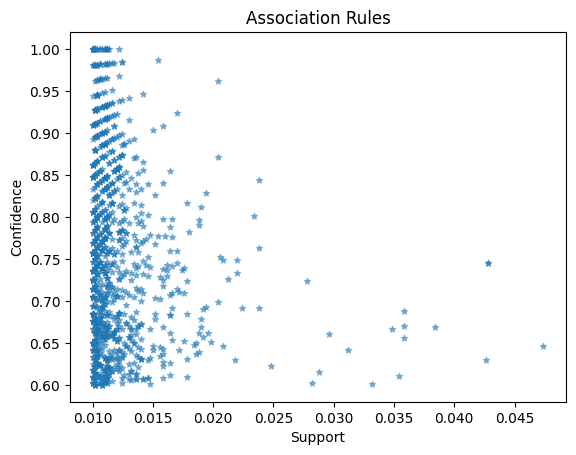

In [46]:
rules.plot.scatter("support", "confidence", alpha=0.5, marker="*")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()

6. Look at the distribution of confidence

Text(0.5, 1.0, 'Confidence')

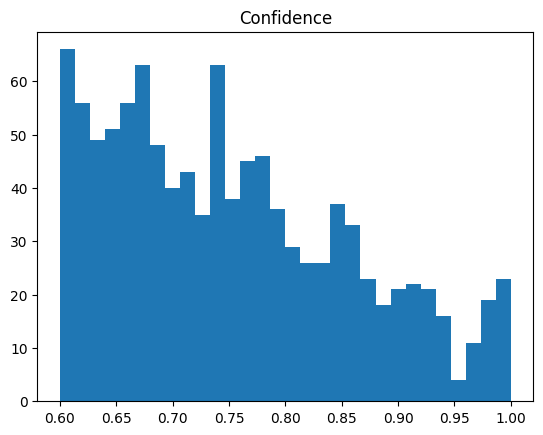

In [47]:
rules.hist("confidence", grid=False, bins=30)
plt.title("Confidence")

7. Now, look at the distribution of lift

Text(0.5, 1.0, 'Lift')

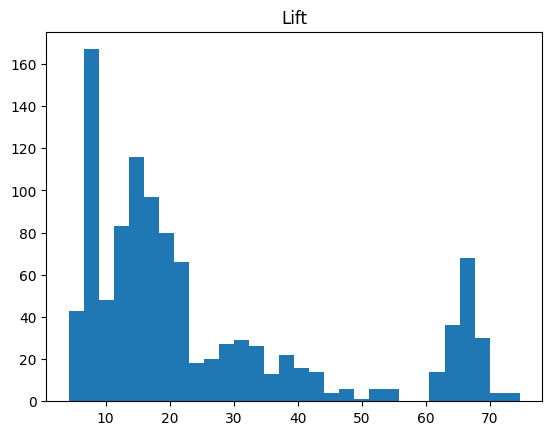

In [48]:
rules.hist("lift", grid=False, bins=30)
plt.title("Lift")

8. Now, look at the distribution of leverage

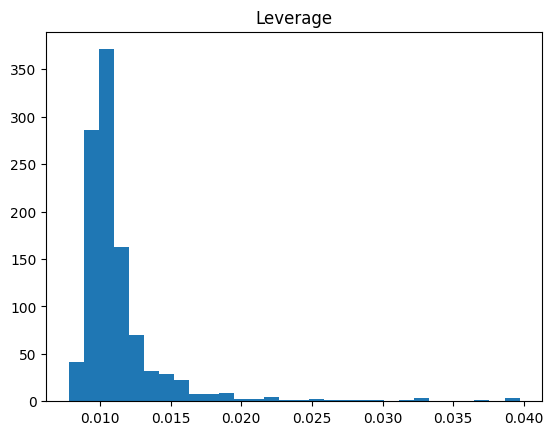

In [49]:
rules.hist("leverage", grid=False, bins=30)
plt.title("Leverage");

9. Now, look at the distribution of conviction

Text(0.5, 1.0, 'Conviction')

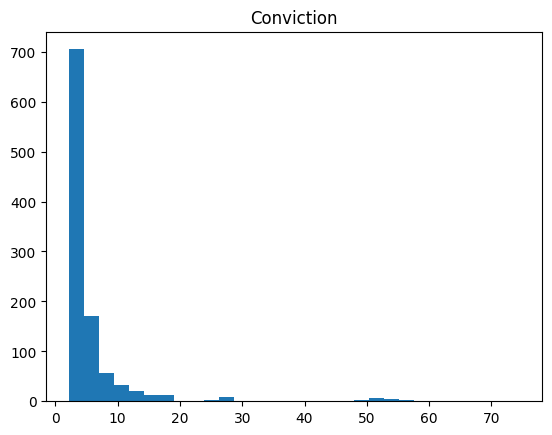

In [50]:
plt.hist(
    rules[numpy.isfinite(rules['conviction'])].conviction.values, 
    bins = 30
)
plt.title("Conviction")

# Activity 20: Finding the Association Rules on the Complete Online Retail Dataset

1. Fit the association rule model on the full dataset. Use metric confidence and a minimum threshold of 0.6.

In [51]:
rules = mlxtend.frequent_patterns.association_rules(
    mod_colnames_minsupport, 
    metric="confidence",
    min_threshold=0.6, 
    support_only=False
)
rules.loc[0:6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(12 PENCILS SMALL TUBE SKULL),(12 PENCILS SMALL TUBE RED RETROSPOT),0.0222,0.0276,0.0152,0.684685,24.807416,0.014587,3.083897,0.981478
1,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.0208,0.0546,0.0140,0.673077,12.327416,0.012864,2.891812,0.938399
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED ),0.0208,0.0520,0.0140,0.673077,12.943787,0.012918,2.899765,0.942344
3,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.0268,0.0546,0.0164,0.611940,11.207698,0.014937,2.436223,0.935857
4,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE GREEN),0.0278,0.0546,0.0208,0.748201,13.703323,0.019282,3.754589,0.953533
5,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.0520,0.0546,0.0358,0.688462,12.609186,0.032961,3.034617,0.971195
6,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.0546,0.0520,0.0358,0.655678,12.609186,0.032961,2.753234,0.973866


2. Count the number of association rules. Is the number different to that found in step 1 of Exercise 45, Deriving Association Rules?

In [52]:
print("Number of Associations: {}".format(rules.shape[0]))

Number of Associations: 1064


3. Plot confidence against support

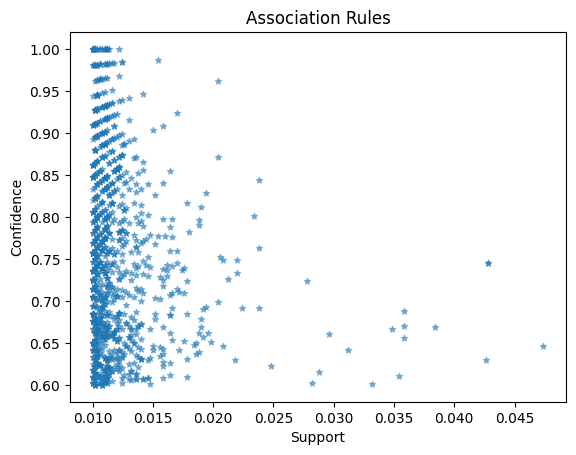

In [53]:
rules.plot.scatter("support", "confidence", alpha=0.5, marker="*")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()

4. Look at the distributions of confidence, lift, leverage, and conviction.

Text(0.5, 1.0, 'Lift')

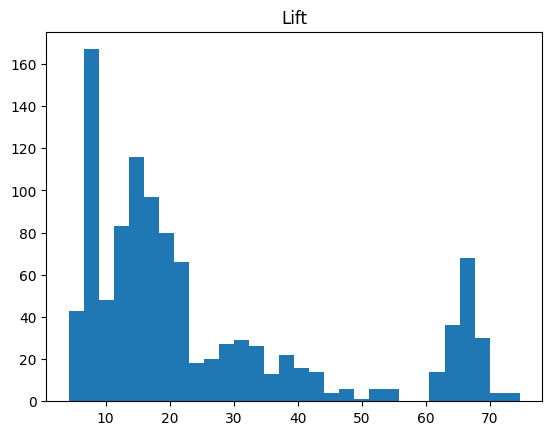

In [54]:
rules.hist("lift", grid=False, bins=30)
plt.title("Lift")

Text(0.5, 1.0, 'Leverage')

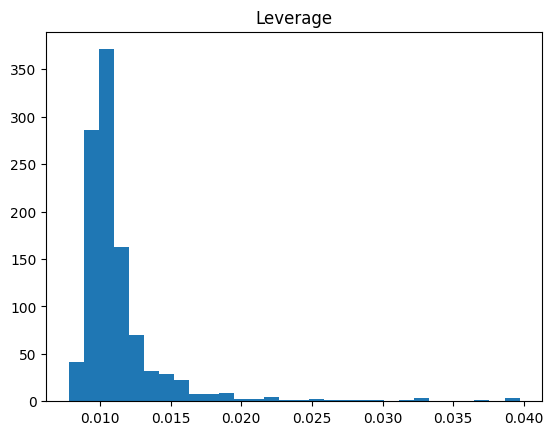

In [55]:
rules.hist("leverage", grid=False, bins=30)
plt.title("Leverage")

Text(0.5, 1.0, 'Conviction')

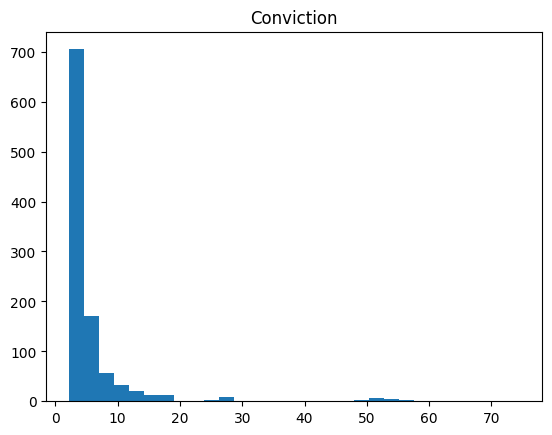

In [56]:
plt.hist(
    rules[numpy.isfinite(rules['conviction'])].conviction.values, 
    bins = 30
)
plt.title("Conviction")